# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

*Notebook generated with AI assistance. Please use caution when interpreting the code or results, and verify any findings independently.*

---

## Overview

This notebook presents an interactive introduction to [Dandiset 001366](https://dandiarchive.org/dandiset/001366/0.250324.1603):  
**"Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification"**.

The dataset consists of high-frame-rate grayscale movies of pial vessels in mice, acquired for comparative analysis of different vessel diameter and pulsatility quantification methods. The data is provided in the NWB format and includes comprehensive metadata for reproducibility.

---

**Dandiset Highlights:**
- Contains movies of mouse pial vessels for monitoring diameter and pulsatility.
- Two subjects, each with a single NWB file containing time series image data plus detailed session and subject metadata.
- Primary use cases: vessel segmentation, diameter quantification, pulsation analysis, benchmarking image analysis algorithms.

## What This Notebook Covers

- How to find and list data assets in the Dandiset using the DANDI API.
- How to stream NWB files remotely and explore their metadata and movie content.
- Visualizations of key frames and derived time series to illustrate data structure and analysis potential.
- Code templates for exploring any file in the Dandiset, with reproducible best practices.

---
**Required Packages:**  
- `dandi`
- `remfile`
- `pynwb`
- `h5py`
- `matplotlib`
- `numpy`

## 1. Inspecting Available NWB Files in the Dandiset

First, let's list the NWB files available in Dandiset 001366, including their paths and sizes. This gives an overview of what files are available for exploration.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to the DANDI Archive and get the dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")

# List .nwb asset paths and sizes in the dandiset
assets = list(dandiset.get_assets_by_glob("*.nwb"))
print("Found NWB assets in this Dandiset:\n")
for asset in assets:
    size_mb = round(asset.size / 1e6, 2)
    print(f"{asset.path} ({size_mb} MB)")

Found NWB assets in this Dandiset:

sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (408.09 MB)
sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (2377.82 MB)


### NWB Asset Summary

- **sub-F15/sub-F15_ses-F15BC-19102023_image.nwb** (408 MB)  
- **sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb** (2378 MB)

We'll use the smaller file for fast demonstrations and then show how the same workflow applies to other files.

## 2. Loading and Exploring NWB Files Remotely

Here is a function for programmatically streaming and opening any NWB file from this Dandiset without downloading it locally. This template can be reused for any NWB asset path listed above.

In [2]:
import remfile
import h5py
import pynwb

def load_nwb_file(dandiset_id, version, asset_path):
    """
    Stream an NWB file from DANDI and load it with pynwb.
    Returns: nwbfile, movies (ImageSeries), asset
    """
    client = DandiAPIClient()
    dandiset = client.get_dandiset(dandiset_id, version)
    asset = next(dandiset.get_assets_by_glob(asset_path))
    remote_file = remfile.File(asset.download_url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
    nwbfile = io.read()
    movies = nwbfile.acquisition['Movies']
    return nwbfile, movies, asset

# Demo: Load the smaller NWB file to explore structure and data
nwb_path = 'sub-F15/sub-F15_ses-F15BC-19102023_image.nwb'
nwbfile, movies, asset = load_nwb_file(
    dandiset_id='001366',
    version='0.250324.1603',
    asset_path=nwb_path
)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### 2.1 Examine File Metadata

Basic metadata: session description, experiment, and subject.

In [3]:
# Print high-level session/experiment/subject info
print("Session description:", nwbfile.session_description)
print("Experiment description:", nwbfile.experiment_description)
print("Session ID:", nwbfile.session_id)
print("Session start:", nwbfile.session_start_time)
print("Institution:", nwbfile.institution)

subject = nwbfile.subject
print("Subject ID:", subject.subject_id)
print("Species:", subject.species)
print("Sex:", subject.sex)
print("Age:", subject.age)
print("Strain:", getattr(subject, 'strain', '(not specified)'))
print("Description:", subject.description)

Session description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Experiment description: Vessel diameter and pulsatility measurement.
Session ID: F15BC-19102023
Session start: 2023-10-19 02:00:00-04:00
Institution: University of Copenhagen
Subject ID: F15
Species: Mus musculus
Sex: F
Age: P9W/P16W
Strain: C57BL/6J
Description: wild-type mouse


### 2.2 Inspect Movie Acquisition Details

The main data in each NWB file is a time series of images ("Movies"), stored as an `ImageSeries`.
Let's inspect:
- Sampling rate (Hz)
- Number of frames
- Image frame size (pixels)
- Data type

In [4]:
print("Movies acquisition name:", movies.name)
print("Description:", movies.description)
print("Sampling rate (Hz):", movies.rate)
print("Shape (frames, height, width):", movies.data.shape)
print("Data type:", movies.data.dtype)

Movies acquisition name: Movies
Description: 16-bit grayscale movie of a pial vessel
Sampling rate (Hz): 54.47
Shape (frames, height, width): (9553, 214, 132)
Data type: uint16


## 3. Visualizing Movie Data: Sample Frames

To get a sense of the imaging content, let's plot a few evenly spaced frames from the movie.

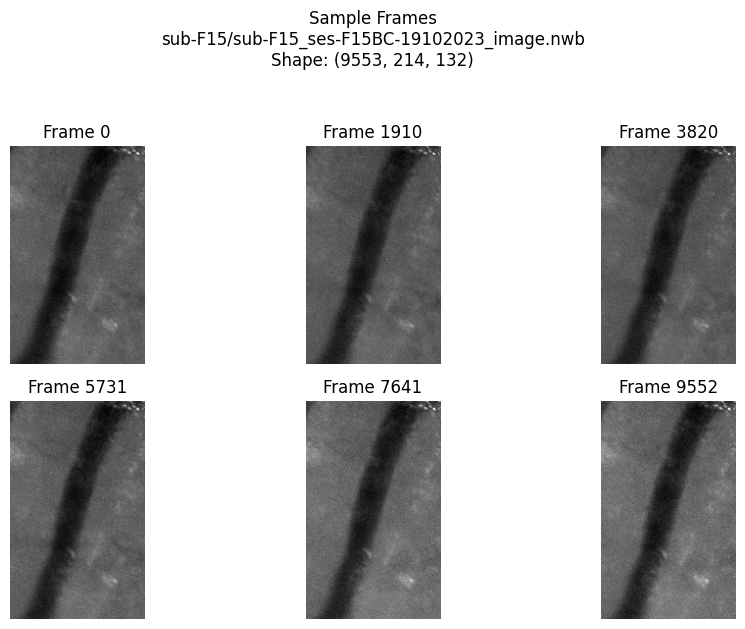

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get shape information
num_frames, height, width = movies.data.shape

# Choose 6 sample frames spread evenly across the video
indices = np.linspace(0, num_frames - 1, 6, dtype=int)
frames = []
for i in indices:
    frame = movies.data[i, :, :]  # shape (height, width)
    frames.append(frame)

# Plot the frames in a grid
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
for j, ax in enumerate(axes):
    ax.imshow(frames[j], cmap="gray")
    ax.set_title(f"Frame {indices[j]}")
    ax.axis("off")
fig.suptitle(f"Sample Frames\n{nwb_path}\nShape: {movies.data.shape}", y=1.04)
plt.tight_layout()
plt.show()

**Interpretation:**  
Each frame shows a cross-section of the mouse pial vessel. There may be subtle movement or pulsatile changes across frames, which can be analyzed quantitatively.

## 4. Extracting a Temporal Intensity Trace

Tracking the mean pixel intensity along a line through the vessel over time can reveal physiological pulsations or vessel diameter changes.

Below, we extract the mean intensity from a vertical band at the center of each frame and plot the resulting time series.

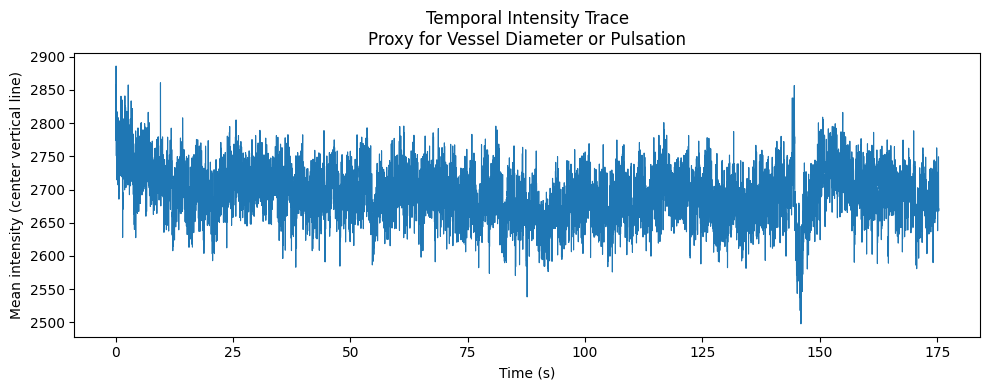

In [6]:
# Pick a vertical line at the center column of the frame
col = width // 2
# Use a 6-pixel wide vertical band around the center row
rows = np.arange(height // 2 - 3, height // 2 + 3)

trace = []
for i in range(num_frames):
    frame = movies.data[i, :, :]
    profile = frame[rows, col]
    trace.append(np.mean(profile))
trace = np.array(trace)

# Convert frame indices to seconds
time = np.arange(num_frames) / movies.rate

plt.figure(figsize=(10, 4))
plt.plot(time, trace, lw=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Mean intensity (center vertical line)')
plt.title('Temporal Intensity Trace\nProxy for Vessel Diameter or Pulsation')
plt.tight_layout()
plt.show()

**Interpretation:**  
Fluctuations in the trace may reflect vessel wall movements due to pulsation, allowing quantification of rhythmic phenomena or vessel dynamics. This is a common first step in vessel diameter measurement analyses.

## 5. Exploring the Second NWB File: Metadata

Let's repeat the metadata exploration for the second file to illustrate consistency (and differences) between files.

In [7]:
# Path for second file (larger; we won't plot frames for speed)
nwb_path2 = 'sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb'
nwbfile2, movies2, asset2 = load_nwb_file(
    dandiset_id='001366',
    version='0.250324.1603',
    asset_path=nwb_path2
)
print("Session:", nwbfile2.session_description)
print("Experiment:", nwbfile2.experiment_description)
print("Subject ID:", nwbfile2.subject.subject_id)
print("Species:", nwbfile2.subject.species)
print("Sex:", nwbfile2.subject.sex)
print("Age:", nwbfile2.subject.age)
print("Strain:", getattr(nwbfile2.subject, 'strain', '(not specified)'))
print("Movie shape:", movies2.data.shape)
print("Frame rate (Hz):", movies2.rate)

Session: the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Experiment: Vessel diameter and pulsatility measurement.
Subject ID: 031224_M4
Species: Mus musculus
Sex: M
Age: P2M
Strain: C57BL/6
Movie shape: (6000, 512, 512)
Frame rate (Hz): 30.0


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## 6. Generalized Templates for Data Exploration

The code snippets above can be reused to:
- Load and inspect any NWB file in the Dandiset
- Explore subject/session metadata for reproducibility and group analysis
- Extract and visualize movie frames/time series for reanalysis

**Best practice:** Always use metadata (`movies.rate`, `movies.data.shape`, `nwbfile.subject`, etc.) rather than hard-coded assumptions.

## 7. Next Steps and Analytic Opportunities

With these tools, researchers can:
- Develop/benchmark vessel diameter extraction algorithms (e.g., edge detection, FWHM, Radon transform)
- Analyze pulsation dynamics using the extracted traces
- Compare across subjects or sessions using standardized metadata

**Further analysis ideas:**
- Segment vessel walls pixel-by-pixel
- Compute diameter time series and perform frequency analysis
- Quantify pulsatility amplitude/shape
- Relate measurements to experimental or cohort metadata

---

## Summary

This notebook has introduced Dandiset 001366 and demonstrated how to access, visualize, and start analyzing movie-based vessel imaging data in NWB format via remote streaming.  
Researchers are encouraged to build on these examples for their own quantitative and comparative analyses.

---

*Notebook generated with AI assistance. Please verify results, parameters, and interpretations; report issues to the dataset authors or maintainers if found.*